## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0   6.174716  1389.176129  0.160028   3.321197   222.484050
1  70.777262  1022.796795  0.983592   2.860538  1008.412647
2  75.523142  1562.242121  0.459370   5.879595   721.648418
3  32.118689   707.207325  0.567558   6.002223   402.736046
4  35.359945   392.572684  0.506419  10.759677   201.964439


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9920358	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9798327	total: 57.8ms	remaining: 28.9s
2:	learn: 0.9693571	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9577348	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9436072	total: 59.1ms	remaining: 11.8s
5:	learn: 0.9316390	total: 59.6ms	remaining: 9.87s
6:	learn: 0.9179089	total: 60ms	remaining: 8.52s
7:	learn: 0.9069334	total: 60.6ms	remaining: 7.51s
8:	learn: 0.8942549	total: 61ms	remaining: 6.72s
9:	learn: 0.8810038	total: 61.4ms	remaining: 6.08s
10:	learn: 0.8708003	total: 61.8ms	remaining: 5.56s
11:	learn: 0.8578493	total: 62.4ms	remaining: 5.13s
12:	learn: 0.8463677	total: 62.7ms	remaining: 4.76s
13:	learn: 0.8335187	total: 63.3ms	remaining: 4.46s
14:	learn: 0.8210452	total: 64ms	remaining: 4.2s
15:	learn: 0.8109282	total: 64.7ms	remaining: 3.98s
16:	learn: 0.7990253	total: 65.2ms	remaining: 3.77s
17:	learn: 0.7878356	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7795637	total: 66.1ms	remaining: 3.41s

90:	learn: 0.3249847	total: 98.3ms	remaining: 982ms
91:	learn: 0.3217303	total: 98.7ms	remaining: 974ms
92:	learn: 0.3173639	total: 99.2ms	remaining: 967ms
93:	learn: 0.3138942	total: 99.5ms	remaining: 959ms
94:	learn: 0.3104744	total: 99.9ms	remaining: 952ms
95:	learn: 0.3073127	total: 100ms	remaining: 945ms
96:	learn: 0.3036935	total: 101ms	remaining: 939ms
97:	learn: 0.3001545	total: 101ms	remaining: 932ms
98:	learn: 0.2974645	total: 102ms	remaining: 925ms
99:	learn: 0.2947736	total: 102ms	remaining: 918ms
100:	learn: 0.2915440	total: 102ms	remaining: 912ms
101:	learn: 0.2890450	total: 103ms	remaining: 906ms
102:	learn: 0.2867116	total: 103ms	remaining: 900ms
103:	learn: 0.2839315	total: 104ms	remaining: 895ms
104:	learn: 0.2808113	total: 104ms	remaining: 889ms
105:	learn: 0.2770556	total: 105ms	remaining: 884ms
106:	learn: 0.2737083	total: 105ms	remaining: 878ms
107:	learn: 0.2710626	total: 106ms	remaining: 873ms
108:	learn: 0.2680971	total: 106ms	remaining: 869ms
109:	learn: 0.265

289:	learn: 0.0608570	total: 185ms	remaining: 453ms
290:	learn: 0.0604648	total: 186ms	remaining: 452ms
291:	learn: 0.0600612	total: 186ms	remaining: 451ms
292:	learn: 0.0596876	total: 186ms	remaining: 450ms
293:	learn: 0.0593367	total: 187ms	remaining: 449ms
294:	learn: 0.0590381	total: 187ms	remaining: 448ms
295:	learn: 0.0586868	total: 188ms	remaining: 446ms
296:	learn: 0.0584069	total: 188ms	remaining: 445ms
297:	learn: 0.0580669	total: 188ms	remaining: 444ms
298:	learn: 0.0577556	total: 189ms	remaining: 443ms
299:	learn: 0.0574442	total: 189ms	remaining: 441ms
300:	learn: 0.0571386	total: 190ms	remaining: 440ms
301:	learn: 0.0568652	total: 190ms	remaining: 439ms
302:	learn: 0.0565694	total: 191ms	remaining: 438ms
303:	learn: 0.0562745	total: 191ms	remaining: 437ms
304:	learn: 0.0559885	total: 192ms	remaining: 437ms
305:	learn: 0.0556968	total: 192ms	remaining: 436ms
306:	learn: 0.0554165	total: 193ms	remaining: 435ms
307:	learn: 0.0553033	total: 193ms	remaining: 434ms
308:	learn: 

501:	learn: 0.0296072	total: 279ms	remaining: 276ms
502:	learn: 0.0295051	total: 279ms	remaining: 276ms
503:	learn: 0.0294024	total: 279ms	remaining: 275ms
504:	learn: 0.0293100	total: 280ms	remaining: 274ms
505:	learn: 0.0292338	total: 280ms	remaining: 274ms
506:	learn: 0.0291347	total: 281ms	remaining: 273ms
507:	learn: 0.0291062	total: 281ms	remaining: 272ms
508:	learn: 0.0290161	total: 281ms	remaining: 271ms
509:	learn: 0.0289418	total: 282ms	remaining: 271ms
510:	learn: 0.0289032	total: 282ms	remaining: 270ms
511:	learn: 0.0288161	total: 283ms	remaining: 269ms
512:	learn: 0.0287036	total: 283ms	remaining: 269ms
513:	learn: 0.0286036	total: 283ms	remaining: 268ms
514:	learn: 0.0285164	total: 284ms	remaining: 267ms
515:	learn: 0.0284312	total: 284ms	remaining: 267ms
516:	learn: 0.0282605	total: 285ms	remaining: 266ms
517:	learn: 0.0281669	total: 285ms	remaining: 265ms
518:	learn: 0.0280586	total: 285ms	remaining: 265ms
519:	learn: 0.0280180	total: 286ms	remaining: 264ms
520:	learn: 

704:	learn: 0.0148512	total: 364ms	remaining: 152ms
705:	learn: 0.0147930	total: 364ms	remaining: 152ms
706:	learn: 0.0147167	total: 365ms	remaining: 151ms
707:	learn: 0.0146423	total: 365ms	remaining: 150ms
708:	learn: 0.0145801	total: 365ms	remaining: 150ms
709:	learn: 0.0145238	total: 366ms	remaining: 149ms
710:	learn: 0.0144519	total: 366ms	remaining: 149ms
711:	learn: 0.0143914	total: 367ms	remaining: 148ms
712:	learn: 0.0143217	total: 367ms	remaining: 148ms
713:	learn: 0.0142629	total: 367ms	remaining: 147ms
714:	learn: 0.0142085	total: 368ms	remaining: 147ms
715:	learn: 0.0141478	total: 368ms	remaining: 146ms
716:	learn: 0.0140815	total: 369ms	remaining: 146ms
717:	learn: 0.0140245	total: 369ms	remaining: 145ms
718:	learn: 0.0139878	total: 370ms	remaining: 144ms
719:	learn: 0.0139519	total: 370ms	remaining: 144ms
720:	learn: 0.0138940	total: 371ms	remaining: 143ms
721:	learn: 0.0138406	total: 371ms	remaining: 143ms
722:	learn: 0.0137853	total: 371ms	remaining: 142ms
723:	learn: 

929:	learn: 0.0075210	total: 457ms	remaining: 34.4ms
930:	learn: 0.0075143	total: 457ms	remaining: 33.9ms
931:	learn: 0.0075076	total: 458ms	remaining: 33.4ms
932:	learn: 0.0074870	total: 458ms	remaining: 32.9ms
933:	learn: 0.0074660	total: 458ms	remaining: 32.4ms
934:	learn: 0.0074466	total: 459ms	remaining: 31.9ms
935:	learn: 0.0074190	total: 459ms	remaining: 31.4ms
936:	learn: 0.0073874	total: 460ms	remaining: 30.9ms
937:	learn: 0.0073527	total: 460ms	remaining: 30.4ms
938:	learn: 0.0073218	total: 461ms	remaining: 29.9ms
939:	learn: 0.0073020	total: 461ms	remaining: 29.4ms
940:	learn: 0.0072749	total: 461ms	remaining: 28.9ms
941:	learn: 0.0072564	total: 462ms	remaining: 28.4ms
942:	learn: 0.0072510	total: 462ms	remaining: 27.9ms
943:	learn: 0.0072456	total: 463ms	remaining: 27.4ms
944:	learn: 0.0072298	total: 464ms	remaining: 27ms
945:	learn: 0.0072180	total: 464ms	remaining: 26.5ms
946:	learn: 0.0071906	total: 464ms	remaining: 26ms
947:	learn: 0.0071674	total: 465ms	remaining: 25.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

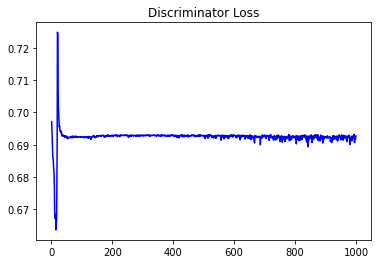

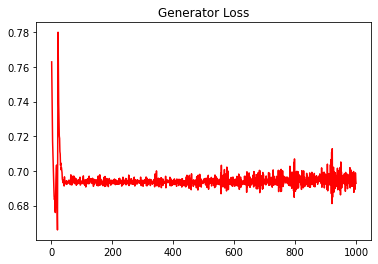

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.013912116968131471


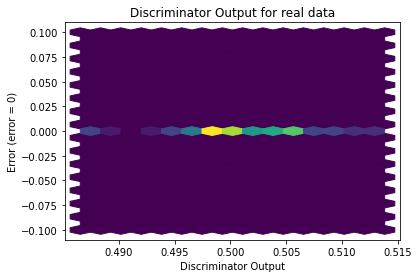

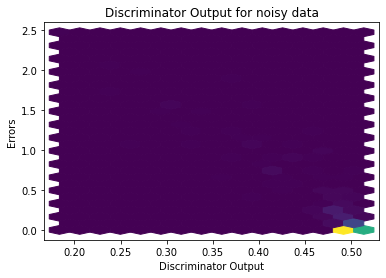

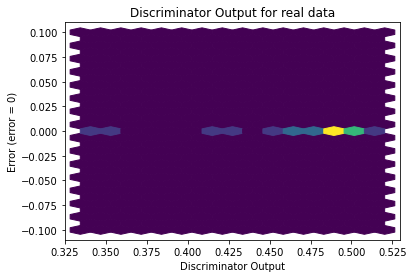

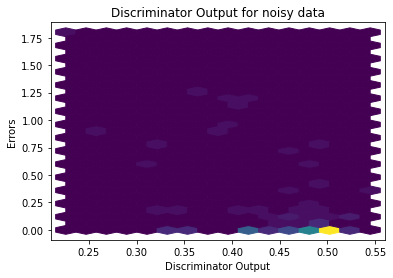

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


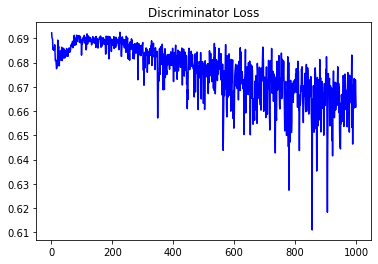

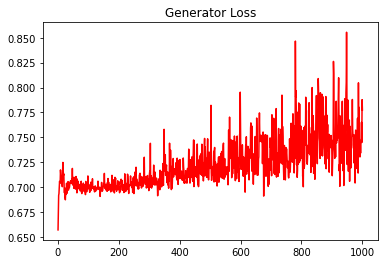

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007806330216049741


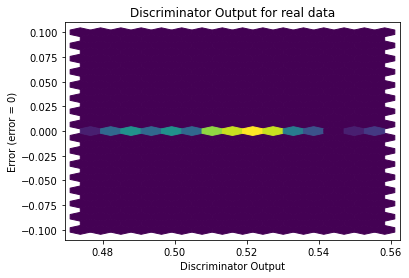

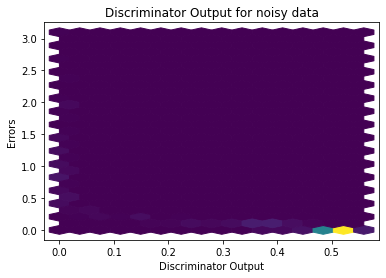

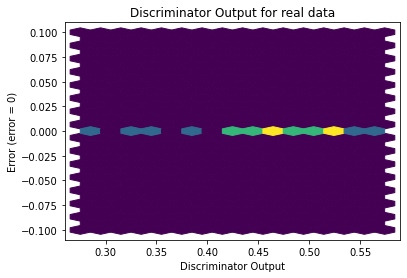

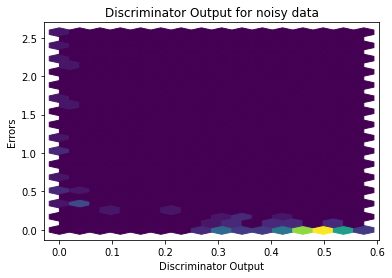

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1233]], requires_grad=True)
